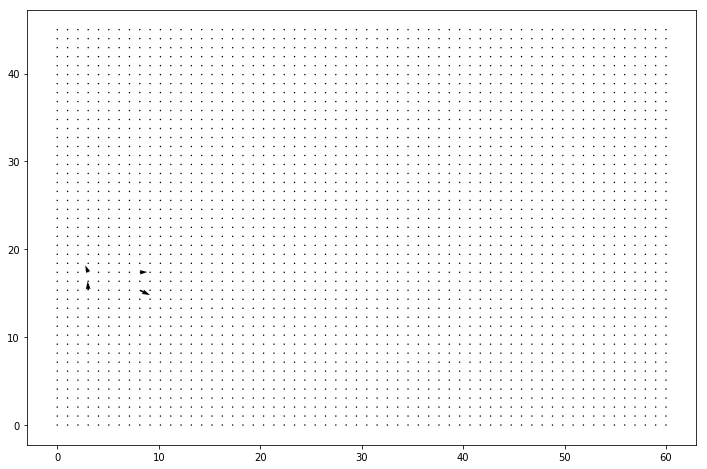

In [1]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

# Importing Python scripts
import smoothing as sm
import edge_detector as ed
import opticalflowlk as op
import harris as harris

%matplotlib inline

In [3]:
v = harris.vector_field()

{(84, 76): 37.840000000000003, (76, 81): 9029.2399999999689, (79, 94): 12.759999999999998, (95, 80): 61.000000000000028}


In [15]:
v[0][1]

array([-9.52941176])

In [37]:
#img = cv2.imread("ball.jpg", cv2.IMREAD_GRAYSCALE)
#img1 = cv2.imread("ball1.jpg", cv2.IMREAD_GRAYSCALE)
#img2 = cv2.imread("ball2.jpg", cv2.IMREAD_GRAYSCALE)

img1 = cv2.imread("Ball/ball-3.png", cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread("Ball/ball-4.png", cv2.IMREAD_GRAYSCALE)

fig1 = cv2.GaussianBlur(img1, (5, 5), 0).astype('int16')
fig2 = cv2.GaussianBlur(img2, (5, 5), 0).astype('int16')

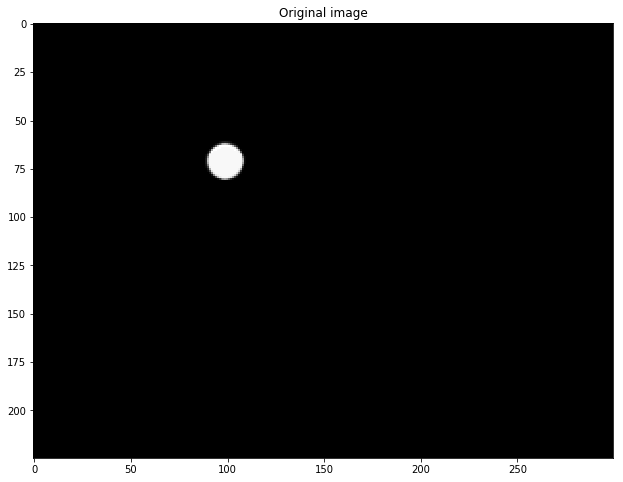

In [38]:
fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(img2, cmap = 'gray')
fig = plt.title('Original image')

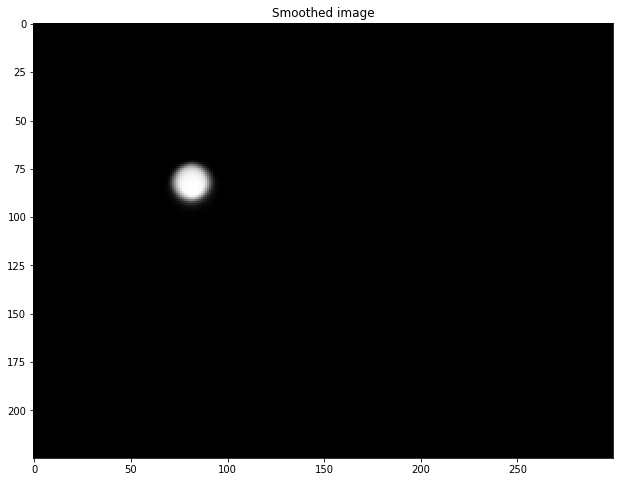

In [39]:
img_1 = sm.smoothing(img1, 2)

fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(img_1, cmap = 'gray')
fig = plt.title('Smoothed image')

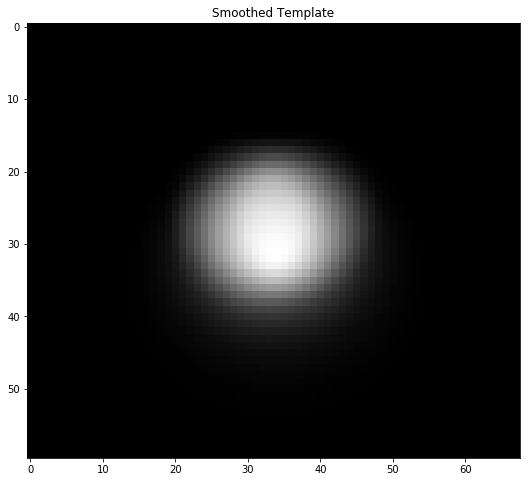

In [40]:
temp = cv2.imread("Ball/template.jpg", cv2.IMREAD_GRAYSCALE)

temp = sm.smoothing(temp, 5)

t_height = temp.shape[0]
t_width = temp.shape[1]

fig = plt.figure(figsize = (12, 8))
fig = plt.imshow(temp, cmap = 'gray')
fig = plt.title('Smoothed Template')

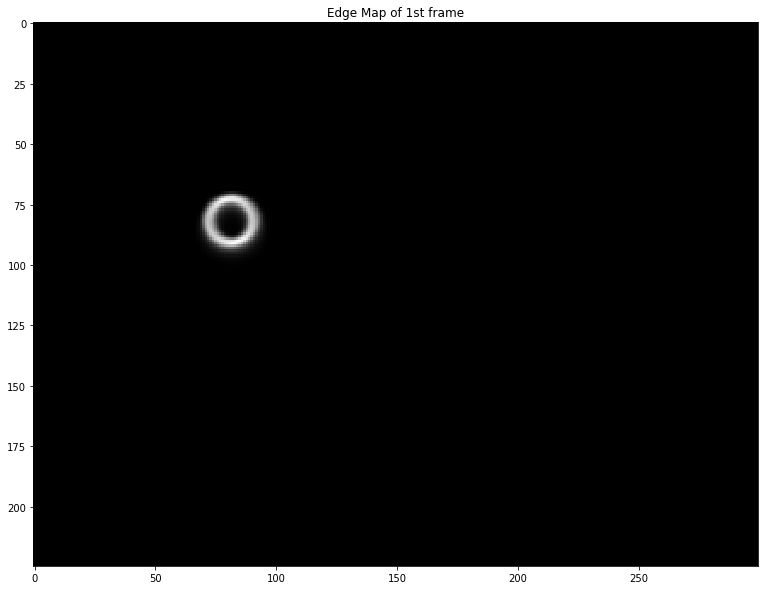

In [41]:
dx, dy, img_d = ed.sobel(img_1)

plt.figure(figsize = (14, 10))
plt.imshow(img_d, cmap = 'gray')
plt.title('Edge Map of 1st frame')

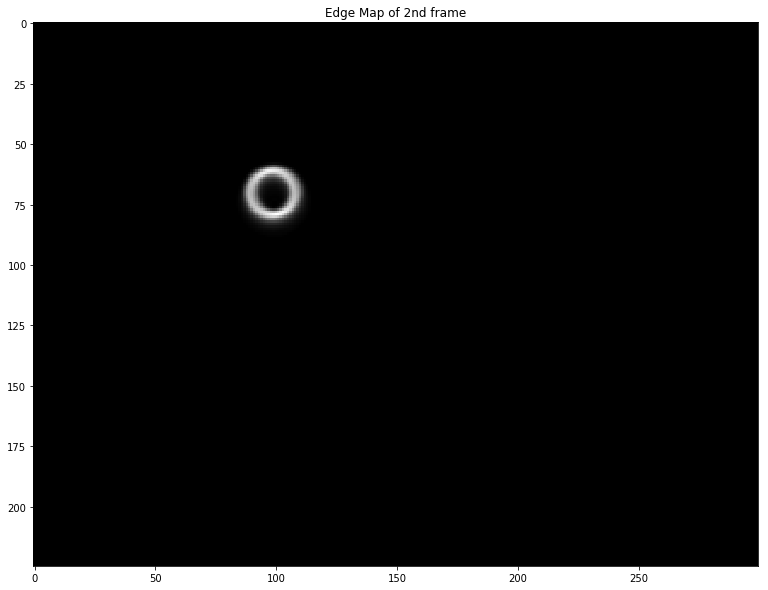

In [42]:
img_2 = sm.smoothing(img2, 2)

#fig = plt.figure(figsize = (12, 8))
#fig = plt.imshow(img_1, cmap = 'gray')
#fig = plt.title('Smoothed image')

dx, dy, img_d2 = ed.sobel(img_2)

plt.figure(figsize = (14, 10))
plt.imshow(img_d2, cmap = 'gray')
plt.title('Edge Map of 2nd frame')

In [43]:
def summation_values(img_d, temp):
    
    height = img_d.shape[0]
    width = img_d.shape[1]

    values = []

    for y in range(height):
        for x in range(width):
            summation = img_d[y:y+t_height, x:x+t_width].sum()
            values.append([y, x, summation])
            
    return values

In [44]:
def get_max_accumulation(img_d, temp):
    # Calling the above function
    values = summation_values(img_d, temp)
    maximum = 0
    idy = []
    idx = []
    
    for i in range(len(values)):
        if values[i][2] > maximum:
            maximum =  values[i][2]

    for i in range(len(values)):
        if values[i][2] == maximum:
            
            idy.append(values[i][0])
            idx.append(values[i][1])
            
    return idx, idy

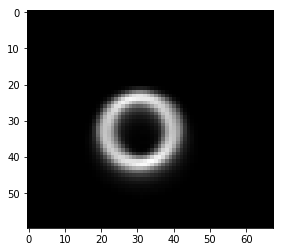

In [45]:
idx, idy = get_max_accumulation(img_d, temp)

# Getting ideal starting points for the window (using mean of all coordinates which had maximum accumulation)
ideal_y = int(np.mean(idy))
ideal_x = int(np.mean(idx))

plt.imshow(img_d[ideal_y:ideal_y+t_height, ideal_x:ideal_x+t_width], cmap = 'gray')

# Optical Flow

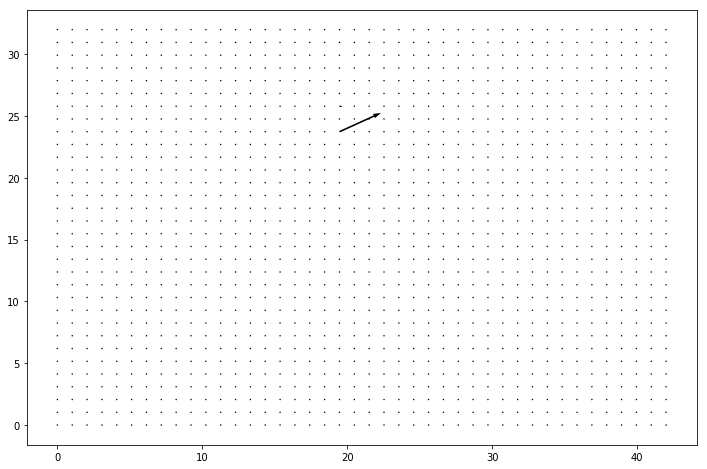

In [90]:
ofu, ofv, ofm = op.opticalflowLK(fig1, fig2, 7)

In [46]:
def get_max(ofu):
    
    height = ofu.shape[0]
    width = ofu.shape[1]
    maximum = ofm.max()
    for y in range(height):
        for x in range(width):
            if ofm[y, x] == maximum:
                max_data = [y, x, maximum]

    return maximum, max_data

In [47]:
#y = ofu.max().astype(int)
#x = ofv.max().astype(int)
#mag = np.sqrt( x**2 + y**2 )
def get_direction(v, i):
    
    ofu = v[i][0]
    ofv = v[i][1]
    #print ofu.max(), ofu.min()
    #print ofv.max(), ofv.min()
    y = ofu.max().astype(int)
    x = ofv.max().astype(int)
    
    return y, x

-7 14


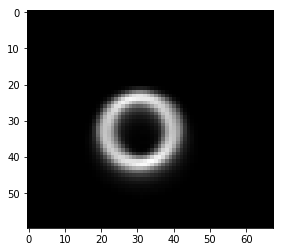

In [65]:
y, x = get_direction(v, 1)
print y, x
ax1 = plt.imshow(img_d[ideal_y:ideal_y+t_height, ideal_x:ideal_x+t_width], cmap = 'gray')
#ax2 = plt.imshow(img_d[ideal_y+y:ideal_y+t_height+y, ideal_x+x:ideal_x+t_width+x], cmap = 'gray')
#plt.show(ax1, ax2)

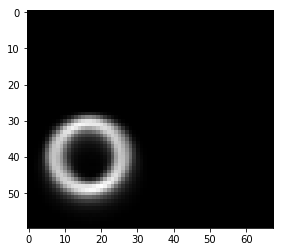

In [67]:
ax2 = plt.imshow(img_d[ideal_y+y:ideal_y+t_height+y, ideal_x+x:ideal_x+t_width+x], cmap = 'gray')

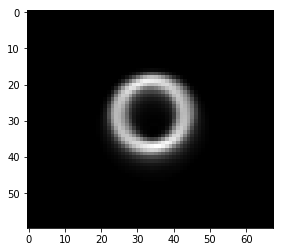

In [66]:
plt.imshow(img_d2[ideal_y+y:ideal_y+t_height+y, ideal_x+x:ideal_x+t_width+x], cmap = 'gray')

31.3490196078 31.3490196078
-9.52941176471 -9.52941176471


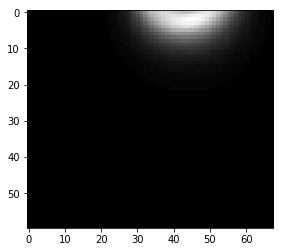

-7.75686785864 -7.75686785864
14.4789046788 14.4789046788


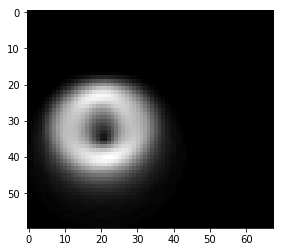

-22.7358490566 -22.7358490566
-55.320754717 -55.320754717


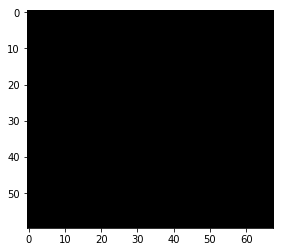

4.4408920985e-16 4.4408920985e-16
-1.0 -1.0


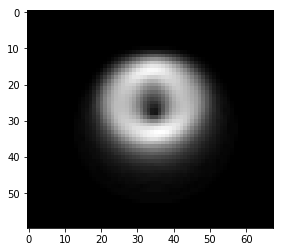

In [32]:
for i in range(len(v)):
    y, x = get_direction(v, i)
    
    # New location of the window (adding the obatined (optical flow) x and y coordinates to the starting position)
    plt.imshow(img_d[ideal_y+y:ideal_y+t_height+y, ideal_x+x:ideal_x+t_width+x], cmap = 'gray')
    plt.show()

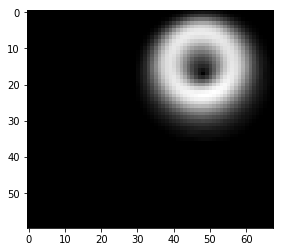

In [94]:
plt.imshow(img_d2[ideal_y+(2*y):ideal_y+t_height+(2*y), ideal_x+(2*x):ideal_x+t_width+(2*x)], cmap = 'gray')